# IPL Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import thinkplot
import thinkstats2
import scipy.stats as ss
%matplotlib inline

In [2]:
sns.set()

In [3]:
match_df = pd.read_csv("Match.csv")

In [4]:
match_df.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


In [5]:
delivery_df = pd.read_csv("Deliveries.csv")

In [6]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Cleaning Data

In [7]:
# Dropping columns that are not required for my project
match_df.drop(['Country_Name', 'City_Name', 'Country_id'], axis=1, inplace=True)

In [8]:
# Checking for any missing values
match_df.isnull().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      1
Toss_Winner     1
match_winner    3
Toss_Name       1
Win_Type        2
Outcome_Type    0
ManOfMach       4
Win_Margin      9
dtype: int64

In [9]:
match_df[match_df['match_winner'].isnull()]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
241,241,501270,Delhi Daredevils,Pune Warriors,5/21/2011,2011,Feroz Shah Kotla,Delhi Daredevils,NaN,bat,NO Result,No Result,NaN,NaN
486,486,829768,Royal Challengers Bangalore,Rajasthan Royals,4/29/2015,2015,M Chinnaswamy Stadium,Rajasthan Royals,NaN,field,NO Result,No Result,NaN,NaN
511,511,829818,Royal Challengers Bangalore,Delhi Daredevils,5/17/2015,2015,M Chinnaswamy Stadium,Royal Challengers Bangalore,NaN,field,NO Result,No Result,NaN,NaN


In [10]:
match_df[match_df['Toss_Winner'].isnull()]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
605,605,1082619,Royal Challengers Bangalore,Sunrisers Hyderabad,4/25/2017,2017,NaN,NaN,abandoned,NaN,NaN,abandoned,NaN,0.0


In [11]:
match_df[match_df['Win_Type'].isnull()]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
605,605,1082619,Royal Challengers Bangalore,Sunrisers Hyderabad,4/25/2017,2017,NaN,NaN,abandoned,NaN,NaN,abandoned,NaN,0.0
611,611,1082625,Gujarat Lions,Mumbai Indians,4/29/2017,2017,Saurashtra Cricket Association Stadium,Gujarat Lions,tied,Bat,NaN,tied,KH Pandya,0.0


In [12]:
match_df[match_df['ManOfMach'].isnull()]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
241,241,501270,Delhi Daredevils,Pune Warriors,5/21/2011,2011,Feroz Shah Kotla,Delhi Daredevils,NaN,bat,NO Result,No Result,NaN,NaN
486,486,829768,Royal Challengers Bangalore,Rajasthan Royals,4/29/2015,2015,M Chinnaswamy Stadium,Rajasthan Royals,NaN,field,NO Result,No Result,NaN,NaN
511,511,829818,Royal Challengers Bangalore,Delhi Daredevils,5/17/2015,2015,M Chinnaswamy Stadium,Royal Challengers Bangalore,NaN,field,NO Result,No Result,NaN,NaN
605,605,1082619,Royal Challengers Bangalore,Sunrisers Hyderabad,4/25/2017,2017,NaN,NaN,abandoned,NaN,NaN,abandoned,NaN,0.0


In [13]:
match_df[match_df['Win_Margin'].isnull()]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
66,66,392195,Kolkata Knight Riders,Rajasthan Royals,4/23/2009,2009,Newlands,Kolkata Knight Riders,Rajasthan Royals,field,Tie,Superover,YK Pathan,NaN
130,130,419126,Chennai Super Kings,Kings XI Punjab,3/21/2010,2010,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,field,Tie,Superover,J Theron,NaN
241,241,501270,Delhi Daredevils,Pune Warriors,5/21/2011,2011,Feroz Shah Kotla,Delhi Daredevils,NaN,bat,NO Result,No Result,NaN,NaN
328,328,598009,Sunrisers Hyderabad,Royal Challengers Bangalore,4/7/2013,2013,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Tie,Superover,GH Vihari,NaN
341,341,598022,Royal Challengers Bangalore,Delhi Daredevils,4/16/2013,2013,M Chinnaswamy Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Tie,Superover,V Kohli,NaN
416,416,729320,Kolkata Knight Riders,Rajasthan Royals,4/29/2014,2014,Sheikh Zayed Stadium,Rajasthan Royals,Rajasthan Royals,bat,Tie,Superover,JP Faulkner,NaN
476,476,829746,Rajasthan Royals,Kings XI Punjab,4/21/2015,2015,"Sardar Patel Stadium, Motera",Kings XI Punjab,Kings XI Punjab,field,Tie,Superover,SE Marsh,NaN
486,486,829768,Royal Challengers Bangalore,Rajasthan Royals,4/29/2015,2015,M Chinnaswamy Stadium,Rajasthan Royals,NaN,field,NO Result,No Result,NaN,NaN
511,511,829818,Royal Challengers Bangalore,Delhi Daredevils,5/17/2015,2015,M Chinnaswamy Stadium,Royal Challengers Bangalore,NaN,field,NO Result,No Result,NaN,NaN


In [14]:
# Removing rows having null values using index
clean_match_df = match_df.drop(index=[241,486,511,605,611])

In [15]:
clean_match_df.isnull().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      0
Toss_Winner     0
match_winner    0
Toss_Name       0
Win_Type        0
Outcome_Type    0
ManOfMach       0
Win_Margin      6
dtype: int64

In [16]:
# Win_Margin is null due to Superover
clean_match_df[clean_match_df['Win_Margin'].isnull()]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
66,66,392195,Kolkata Knight Riders,Rajasthan Royals,4/23/2009,2009,Newlands,Kolkata Knight Riders,Rajasthan Royals,field,Tie,Superover,YK Pathan,NaN
130,130,419126,Chennai Super Kings,Kings XI Punjab,3/21/2010,2010,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,field,Tie,Superover,J Theron,NaN
328,328,598009,Sunrisers Hyderabad,Royal Challengers Bangalore,4/7/2013,2013,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Tie,Superover,GH Vihari,NaN
341,341,598022,Royal Challengers Bangalore,Delhi Daredevils,4/16/2013,2013,M Chinnaswamy Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Tie,Superover,V Kohli,NaN
416,416,729320,Kolkata Knight Riders,Rajasthan Royals,4/29/2014,2014,Sheikh Zayed Stadium,Rajasthan Royals,Rajasthan Royals,bat,Tie,Superover,JP Faulkner,NaN
476,476,829746,Rajasthan Royals,Kings XI Punjab,4/21/2015,2015,"Sardar Patel Stadium, Motera",Kings XI Punjab,Kings XI Punjab,field,Tie,Superover,SE Marsh,NaN


In [17]:
# Checking for Team names
clean_match_df['Team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants'], dtype=object)

In [18]:
clean_match_df['Team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [19]:
clean_match_df['Toss_Winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [20]:
# One Rising Pune Supergiants mispelled as Rising Pune Supergiant
clean_match_df['Toss_Winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               71
Royal Challengers Bangalore    69
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               62
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiants        12
Kochi Tuskers Kerala            8
Rising Pune Supergiant          1
Name: Toss_Winner, dtype: int64

In [21]:
clean_match_df['match_winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [22]:
# In Toss_Winner one of the team name is missing "s"
# Finding and replacing with correct name
clean_match_df[clean_match_df['Toss_Winner'] == 'Rising Pune Supergiant']

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
578,578,1082592,Rising Pune Supergiants,Mumbai Indians,4/6/2017,2017,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Rising Pune Supergiants,Field,wickets,Result,SPD Smith,7.0


In [23]:
clean_match_df['Toss_Winner'] = clean_match_df['Toss_Winner'].replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'])

In [24]:
clean_match_df['Toss_Winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               71
Royal Challengers Bangalore    69
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               62
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: Toss_Winner, dtype: int64

In [25]:
clean_match_df['Toss_Name'].unique()

array(['field', 'bat', 'Field', 'Bat'], dtype=object)

In [26]:
clean_match_df['Toss_Name'].value_counts()

field    313
bat      261
Field     48
Bat       10
Name: Toss_Name, dtype: int64

In [27]:
# Replacing Field and Bat to field and bat.
clean_match_df['Toss_Name'] = clean_match_df['Toss_Name'].replace(['Field', 'Bat'], ['field','bat'])

In [28]:
clean_match_df['Toss_Name'].value_counts()

field    361
bat      271
Name: Toss_Name, dtype: int64

# Bar Chart and Histogram

# Toss Winner by Team

Text(0.5, 1.0, 'Toss winning team')

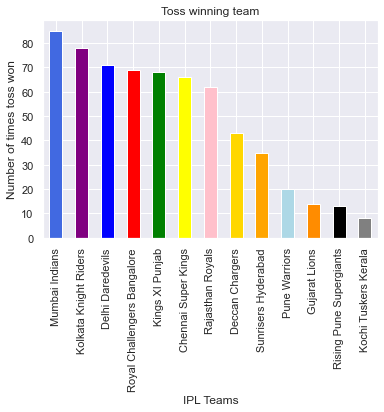

In [29]:
clean_match_df['Toss_Winner'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = ['Royalblue', 'Purple',
                                                                                                       'Blue', 'Red', 'Green',
                                                                                                       'Yellow', 'Pink', 'Gold',
                                                                                                       'Orange','LightBlue','DarkOrange',
                                                                                                       'Black','Grey'])
plt.xticks(rotation = 90)
plt.xlabel('IPL Teams')
plt.ylabel('Number of times toss won')
plt.title('Toss winning team')

# Match Winner

Text(0.5, 1.0, 'Match Winner')

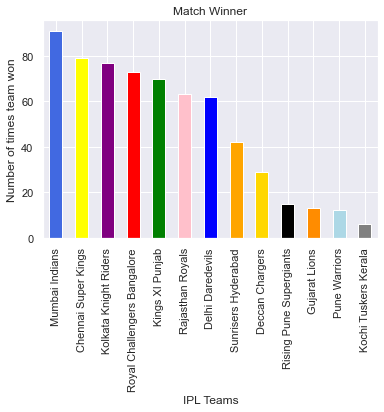

In [31]:
clean_match_df['match_winner'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = ['Royalblue','Yellow','Purple',
                                                                                                       'Red','Green','Pink','Blue',
                                                                                                       'Orange', 'Gold','Black',
                                                                                                       'DarkOrange', 'LightBlue',
                                                                                                       'Grey'])
plt.xticks(rotation = 90)
plt.xlabel('IPL Teams')
plt.ylabel('Number of times team won')
plt.title('Match Winner')

# Toss Winner elected to Bat or Field First

Text(0.5, 1.0, 'Toss Winner elect to bat or field first')

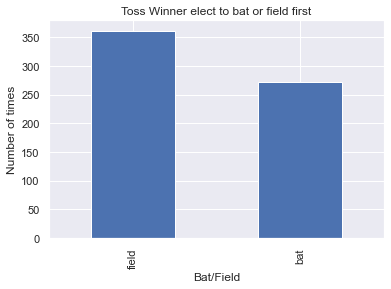

In [32]:
clean_match_df['Toss_Name'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.xlabel('Bat/Field')
plt.ylabel('Number of times')
plt.title('Toss Winner elect to bat or field first')

# Team1 and Team2 participate for the game

Text(0.5, 1.0, 'Team1 to participate for the game')

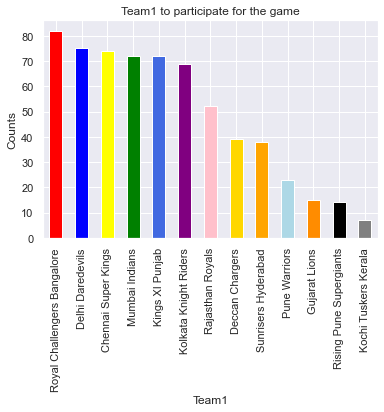

In [33]:
clean_match_df['Team1'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = ['Red','Blue','Yellow',  
                                                                                                 'Green', 'royalblue',
                                                                                                 'Purple', 'Pink', 'Gold',
                                                                                                 'Orange', 'LightBlue',
                                                                                                 'DarkOrange', 'Black',
                                                                                                 'Grey'])
plt.xticks(rotation = 90)
plt.xlabel('Team1')
plt.ylabel('Counts')
plt.title('Team1 to participate for the game')

Text(0.5, 1.0, 'Team2 to participate for the game')

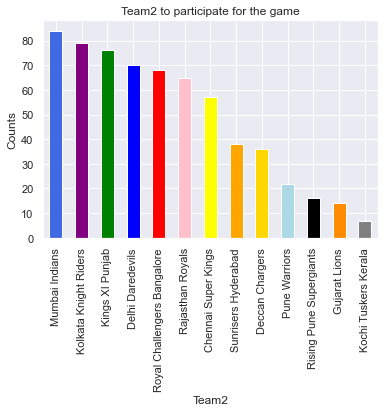

In [34]:
clean_match_df['Team2'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = ['royalblue','Purple','Green','Blue',
                                                                                                  'Red','Pink','Yellow',
                                                                                                  'Orange','Gold','LightBlue',
                                                                                                  'Black','DarkOrange','Grey'])
plt.xticks(rotation = 90)
plt.xlabel('Team2')
plt.ylabel('Counts')
plt.title('Team2 to participate for the game')

In [35]:
clean_match_df.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0


# Team batting first

In [36]:
batting_first = clean_match_df[clean_match_df['Win_Type']=='runs']

In [37]:
batting_first.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0
7,7,335994,Chennai Super Kings,Mumbai Indians,4/23/2008,2008,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,Chennai Super Kings,field,runs,Result,ML Hayden,6.0
9,9,335996,Kings XI Punjab,Mumbai Indians,4/25/2008,2008,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,Kings XI Punjab,field,runs,Result,KC Sangakkara,66.0
14,14,336001,Royal Challengers Bangalore,Chennai Super Kings,4/28/2008,2008,M Chinnaswamy Stadium,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MS Dhoni,13.0


# Team batted first and Won by margin

Text(0, 0.5, 'Number of Matches')

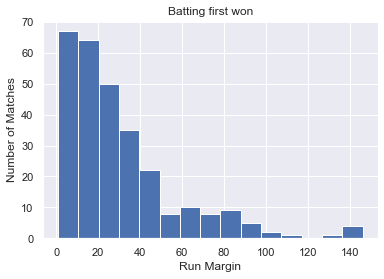

In [197]:
plt.hist(batting_first['Win_Margin'],bins=15)
plt.title('Batting first won')
plt.xlabel('Run Margin')
plt.ylabel('Number of Matches')

Team batting first usually win by 1-40 Runs of Margin and it is very rare that they win by more than 100 Runs. 

# Team batting second

In [39]:
batting_second = clean_match_df[clean_match_df['Win_Type']=='wickets']

In [40]:
batting_second.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0
5,5,335992,Rajasthan Royals,Kings XI Punjab,4/21/2008,2008,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,bat,wickets,Result,SR Watson,6.0
6,6,335993,Deccan Chargers,Delhi Daredevils,4/22/2008,2008,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,bat,wickets,Result,V Sehwag,9.0


# Team batted second and Won by wickets

Text(0, 0.5, 'Number of Matches')

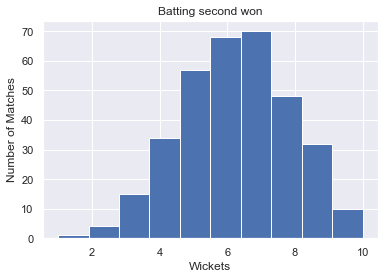

In [41]:
plt.hist(batting_second['Win_Margin'])
plt.title('Batting second won')
plt.xlabel('Wickets')
plt.ylabel('Number of Matches')

Team batting second usually win by 6-7 wickets in hands and it is rare that they win by only one wicket left or without losing any wickets. 

# Team who won toss and elected to field first and won the match

In [42]:
toss_won_match_won_field_first = batting_second[batting_second['Toss_Name']=='field']

In [43]:
toss_won_match_won_field_first['Toss_Name'].value_counts()

field    196
Name: Toss_Name, dtype: int64

In [44]:
clean_match_df['Toss_Name'].value_counts()

field    361
bat      271
Name: Toss_Name, dtype: int64

Team won 196 times out of 361 times when they won toss and elected to field first. 

# Team who won toss and elected to bat first and won the match

In [45]:
toss_won_match_won_bat_first = batting_first[batting_first['Toss_Name']=='bat']

In [46]:
toss_won_match_won_bat_first['Toss_Name'].value_counts()

bat    125
Name: Toss_Name, dtype: int64

In [47]:
clean_match_df['Toss_Name'].value_counts()

field    361
bat      271
Name: Toss_Name, dtype: int64

Team won 125 times out of 271 times they won toss and elected to bat first. 

# delivery_df

# Top 20 Batsman who ran most 3 runs in IPL from 2008-2017

In [48]:
run3 = delivery_df['batsman_runs']==3
new_delivery_df = delivery_df[run3]

In [49]:
new_delivery_df.shape[0]

587

In [50]:
top20run3 = new_delivery_df.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(20)
top20run3

batsman
S Dhawan          18
DA Warner         18
M Vijay           17
G Gambhir         15
AM Rahane         15
AB de Villiers    15
MS Dhoni          14
RV Uthappa        13
MEK Hussey        11
SK Raina          11
SV Samson         11
V Kohli           11
NV Ojha           10
SR Watson          9
M Vohra            9
F du Plessis       9
MK Pandey          8
JH Kallis          8
BJ Hodge           8
MK Tiwary          8
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, 'Most Top 20 batsman ran 3s')

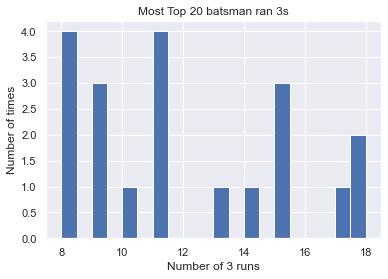

In [56]:
plt.hist(top20run3, bins=20)
plt.xlabel('Number of 3 runs')
plt.ylabel('Number of times')
plt.title('Most Top 20 batsman ran 3s')

Text(0.5, 1.0, 'Most Top 20 batsman ran 3s')

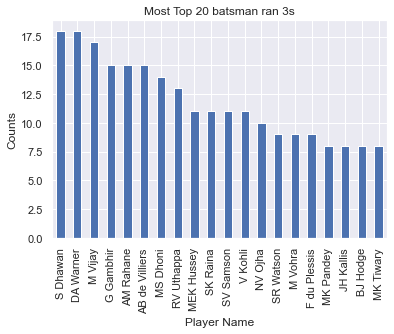

In [200]:
top20run3.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.xlabel('Player Name')
plt.ylabel('Counts')
plt.title('Most Top 20 batsman ran 3s')

S Dhawan and DA Warner ran most 3's in IPL from 2008-2017 with number of times is equal to 18.

# Bowler getting hit for 6's most time by batsman

In [61]:
def sixes_bowler(bowler_name):
    six = delivery_df['batsman_runs']==6
    six_delivery_df = delivery_df[six]
    temp = six_delivery_df[six_delivery_df['bowler']== bowler_name]
    return temp.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(3)

In [63]:
sixes_bowler('YS Chahal')

batsman
DA Warner    8
MS Dhoni     6
SS Iyer      6
Name: batsman_runs, dtype: int64

In [64]:
sixes_bowler('Rashid Khan')

batsman
CH Gayle      6
S Hetmyer     4
RV Uthappa    4
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, '3 Player who hit Rashid Khan most sixes')

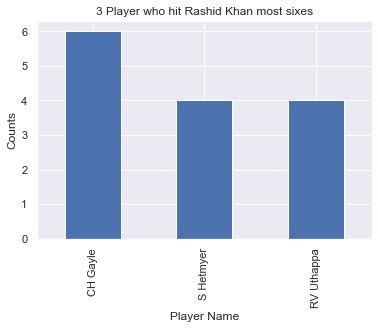

In [66]:
sixes_bowler('Rashid Khan').plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.xlabel('Player Name')
plt.ylabel('Counts')
plt.title('3 Player who hit Rashid Khan most sixes')

CH Gayle hitted most sixes to Rashid Khan with number of sixes equal to 6.  

# PMF

In [98]:
def count_elements(seq):
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [99]:
twmwff = count_elements(toss_won_match_won_field_first['Toss_Name'])
twmwff

{'field': 196}

In [100]:
twmwbf = count_elements(toss_won_match_won_bat_first['Toss_Name'])
twmwbf

{'bat': 125}

In [101]:
# Assigning numeric value 0 and 1 to field and bat respectively.
# Since I having hard time plotting string and int for pmf.
# Number of times won is 196 by chosing field first and 125 times won by batting first. 
d = {0:196, 1:125}
d

{0: 196, 1: 125}

In [102]:
pmf = thinkstats2.Pmf(d, label='actual')
pmf

Pmf({0: 0.6105919003115264, 1: 0.3894080996884735}, 'actual')

In [103]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

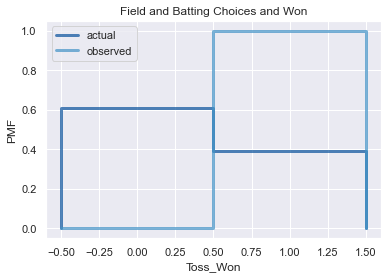

In [104]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Toss_Won', ylabel='PMF', title='Field and Batting Choices and Won')

Probability of winning match by electing to field first is 61 percent and batting first is approximately 39 percent. 

# CDF

In [111]:
cdf = thinkstats2.Cdf(d, label='Toss Winner/Match Winner')
cdf

Cdf([0 1], [0.6105919 1.       ], 'Toss Winner/Match Winner')

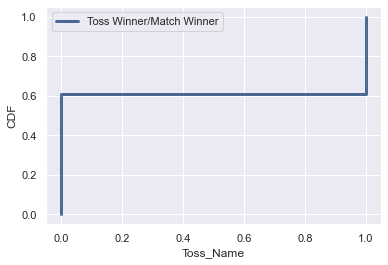

<Figure size 576x432 with 0 Axes>

In [113]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Toss_Name', ylabel='CDF')

It shows 61 percent of Toss Winner elected to field first and won the match. 

# Scatter plot

In [132]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace) 
    sample = df.loc[indices]
    return sample

In [135]:
sample = thinkstats2.SampleRows(delivery_df, 200) 
totalruns, batsmanruns = sample.total_runs, sample.batsman_runs

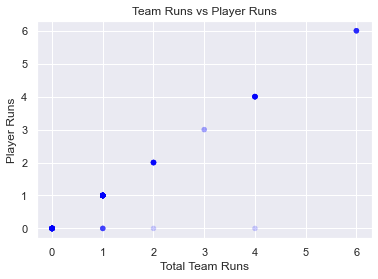

<Figure size 576x432 with 0 Axes>

In [147]:
thinkplot.Scatter(totalruns, batsmanruns)
thinkplot.Show(xlabel='Total Team Runs', ylabel='Player Runs',
              title='Team Runs vs Player Runs')

In [148]:
np.cov(totalruns, batsmanruns)

array([[2.31748744, 2.25979899],
       [2.25979899, 2.32914573]])

In [150]:
thinkstats2.Corr(totalruns, batsmanruns)

0.9726638738345258

In [137]:
sample2 = thinkstats2.SampleRows(delivery_df, 200) 
noball, extra_run  = sample.noball_runs, sample.extra_runs

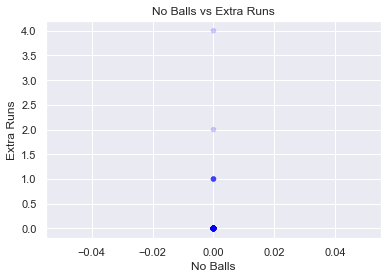

<Figure size 576x432 with 0 Axes>

In [138]:
thinkplot.Scatter(noball, extra_run)
thinkplot.Show(xlabel='No Balls', ylabel='Extra Runs',
              title='No Balls vs Extra Runs')

In [151]:
np.cov(noball, extra_run)

array([[0.        , 0.        ],
       [0.        , 0.12703518]])

In [139]:
tw = clean_match_df['Toss_Winner'].value_counts().sort_index()
mw = clean_match_df['match_winner'].value_counts().sort_index()

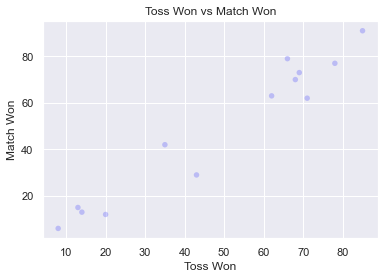

<Figure size 576x432 with 0 Axes>

In [140]:
thinkplot.Scatter(tw, mw)
thinkplot.Show(xlabel='Toss Won', ylabel='Match Won',
              title='Toss Won vs Match Won')

In [141]:
np.cov(tw, mw)

array([[759.42307692, 809.75641026],
       [809.75641026, 912.25641026]])

In [145]:
thinkstats2.Corr(tw, np.log(mw))

0.9538621590163509

In [146]:
thinkstats2.Corr(tw, mw)

0.972868266887141

In [159]:
def pVal(first_array, second_array, iters):
    iters_first_array = np.random.choice(first_array, iters)
    iters_second_array = np.random.choice(second_array, iters)
    # scipy.stats ttest_ind at index 1 returns pValue
    return(ss.ttest_ind(iters_first_array, iters_second_array)[1])

Text(0, 0.5, 'P Value')

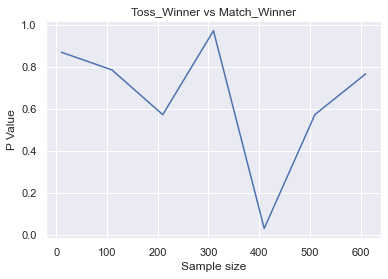

In [163]:
bin_lst = []

samp = np.arange(10, len(clean_match_df), 100)

for i in samp:
    bin_lst.append(pVal(clean_match_df['Toss_Winner'].value_counts(), clean_match_df['match_winner'].value_counts(), i))

plt.plot(samp, bin_lst)
plt.title('Toss_Winner vs Match_Winner')
plt.xlabel('Sample size')
plt.ylabel('P Value')

In [191]:
total_run, batsman_run = delivery_df.total_runs, delivery_df.batsman_runs

In [192]:
model = ss.linregress(total_run, batsman_run)
print(model)



LinregressResult(slope=0.9790120256030593, intercept=-0.03945621184145365, rvalue=0.9772779660702506, pvalue=0.0, stderr=0.0005017746216760767)


In [193]:
m = model[0]
c = model[1]

Text(0, 0.5, 'Batsman Runs')

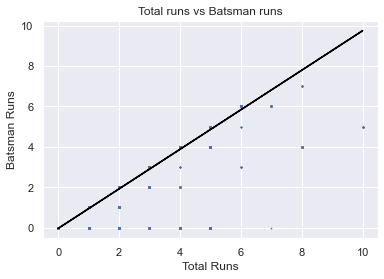

In [194]:
plt.scatter(x = total_run, y = batsman_run, s = 0.5)
plt.plot(total_run, (total_run * m) + c, c = 'black')
plt.title('Total runs vs Batsman runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman Runs')